[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/blog/blob/master/067_autoencoder/autoencoder.ipynb)

# Autoencoders

En el post anterior empezamos a ver qué es el aprendizaje no supervisado.

En este post vamos a ver un primero modelo: el autoencoder.

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000] / 255., X[60000:] / 255., y[:60000].astype(np.int), y[60000:].astype(np.int)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [2]:
import torch
from torch.utils.data import DataLoader

class Dataset(torch.utils.data.Dataset):
  def __init__(self, X):
    self.X = X 

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    return torch.tensor(self.X[ix]).float()

In [3]:
def get_dl(batch_size=526):
    dl = {
        'train': DataLoader(Dataset(X_train), batch_size=batch_size, shuffle=True, pin_memory=True),
        'val': DataLoader(Dataset(X_test), batch_size=batch_size, shuffle=False, pin_memory=True),
    }
    return dl

In [4]:
dl = get_dl(25)
imgs = next(iter(dl['train']))
imgs.shape

torch.Size([25, 784])

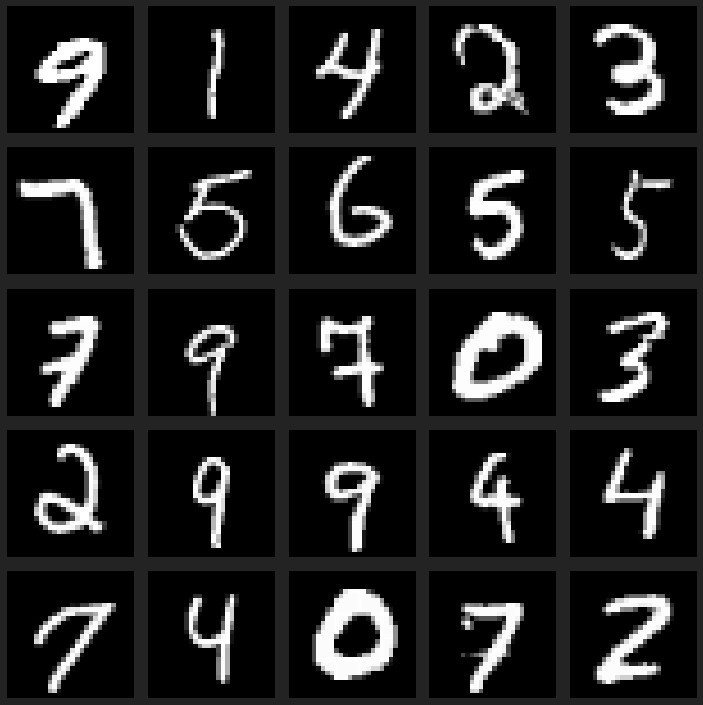

In [5]:
r, c = 5, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        ix = _r*c + _c
        ax = plt.subplot(r, c, ix + 1)
        img = imgs[ix]
        
        ax.axis("off")
        ax.imshow(img.reshape(28,28), cmap="gray")
plt.tight_layout()
plt.show()

In [6]:
class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(784, 300),
            torch.nn.ReLU(),
            torch.nn.Linear(300, 100)
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.ReLU(),
            torch.nn.Linear(100, 300),
            torch.nn.ReLU(),
            torch.nn.Linear(300, 784),
        )
    def forward(self, x):
        return self.decoder(self.encoder(x))

model = Model()
outputs = model(torch.randn(32, 784))
outputs.shape

torch.Size([32, 784])

In [7]:
from tqdm.notebook import trange

def train(model, dl, EPOCHS=5, lr=1e-3):

    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    model.cuda()

    for e in range(1, EPOCHS+1):
        t = trange(len(dl['train']) + len(dl['val']))
        t.container.children[-2].style.bar_color = '#ffff00'  
        t.container.children[-1].style.font_color = '#ffff00'
        l = []
        model.train()
        for x in dl['train']:
            x = x.cuda()
            y_hat = model(x)
            optimizer.zero_grad()
            loss = criterion(y_hat, x)
            loss.backward()
            optimizer.step()
            l.append(loss.item())
            t.set_description(f'Epoch {e}/{EPOCHS} loss {np.mean(l):.3f}')
            t.update()
        model.eval()
        with torch.no_grad():
            vl = []
            for x in dl['val']:
                x = x.cuda()
                y_hat = model(x)
                loss = criterion(y_hat, x)
                vl.append(loss.item())
                t.set_description(f'Epoch {e}/{EPOCHS} loss {np.mean(l):.3f} val_loss {np.mean(vl):.3f}')
                t.update()

In [8]:
dl = {
    'train': DataLoader(Dataset(X_train[:5]), batch_size=5),
    'val': DataLoader(Dataset(X_train[:5]), batch_size=5),
}

train(model, dl, EPOCHS=100)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [9]:
imgs = next(iter(dl['train']))
model.eval()
model.cpu()
with torch.no_grad():
    outputs = model(imgs)
    outputs = torch.sigmoid(outputs)
outputs.shape

torch.Size([5, 784])

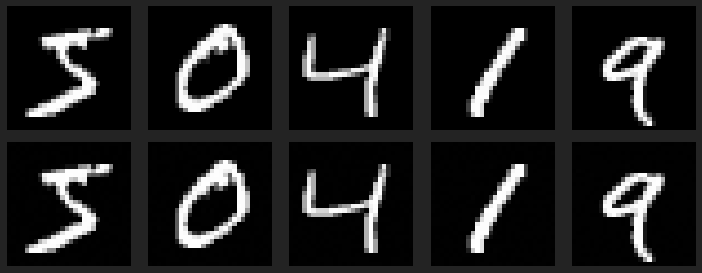

In [10]:
r, c = 2, 5
fig = plt.figure(figsize=(2*c, 2*r))
for ix, (img, output) in enumerate(zip(imgs, outputs)):
    with torch.no_grad():
        ax = plt.subplot(r, c, ix + 1)
        ax.axis("off")
        ax.imshow(img.reshape(28,28), cmap="gray")
        ax = plt.subplot(r, c, ix + c + 1)
        ax.axis("off")
        ax.imshow(output.reshape(28,28), cmap="gray")
plt.tight_layout()
plt.show()

In [11]:
model = Model()
train(model, get_dl(), EPOCHS=100, lr=1e-4)

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

In [12]:
model.encoder[0].weight.shape

torch.Size([300, 784])

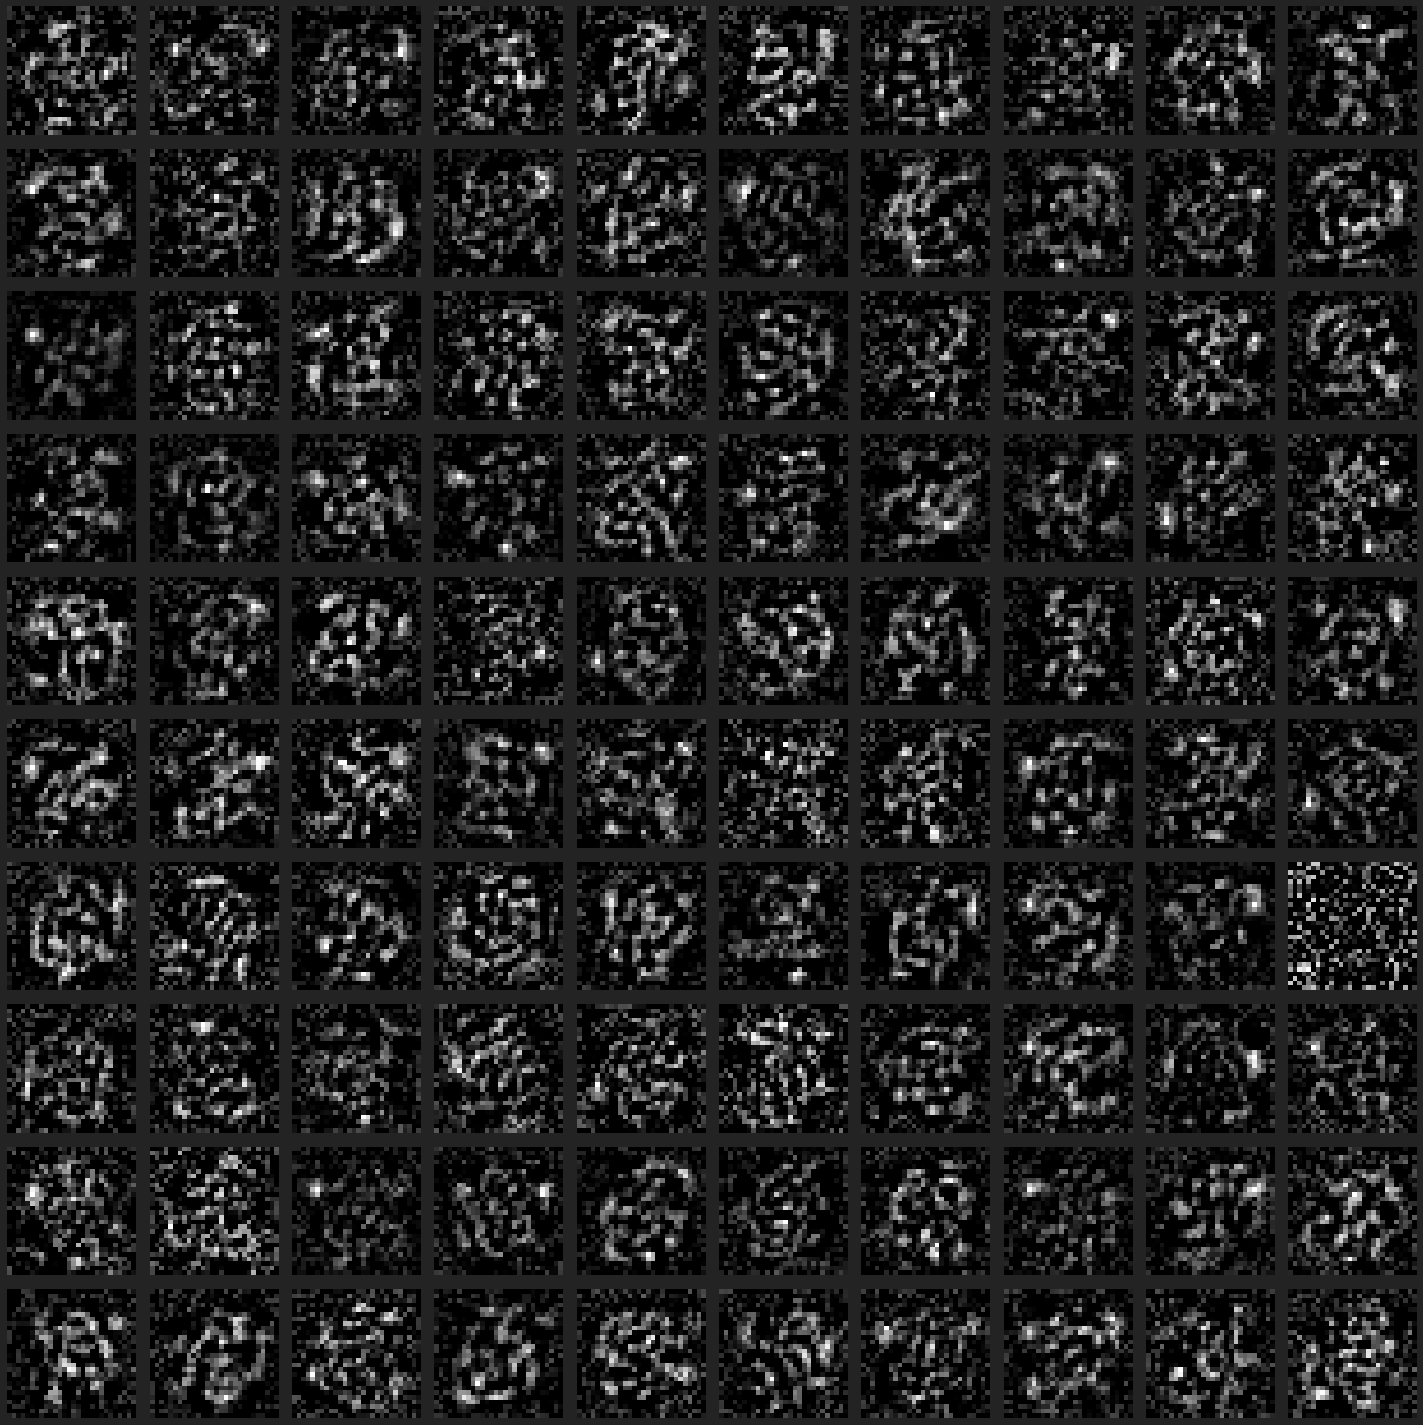

In [13]:
r, c = 10, 10
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        with torch.no_grad():
            ix = _r*c + _c
            ax = plt.subplot(r, c, ix + 1)
            ax.axis("off")
            ax.imshow(model.encoder[0].weight[ix].cpu().reshape(28,28).clip(0,1), cmap="gray")
plt.tight_layout()
plt.show()

# Evaluación

In [14]:
class Dataset2(torch.utils.data.Dataset):
  def __init__(self, X, y):
    self.X = X 
    self.y = y 

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    return torch.tensor(self.X[ix]).float(), torch.tensor(self.y[ix]).long()

In [15]:
def get_dl2(X_train, y_train, batch_size=526):
    dl = {
        'train': DataLoader(Dataset2(X_train, y_train), batch_size=batch_size, shuffle=True, pin_memory=True),
        'val': DataLoader(Dataset2(X_test, y_test), batch_size=batch_size, shuffle=False, pin_memory=True),
    }
    return dl

In [16]:
import copy

def get_model_finetune():
    model2 = torch.nn.Sequential(
        copy.deepcopy(model.encoder.cpu()),
        torch.nn.ReLU(),
        torch.nn.Linear(100, 10)
    )
    return model2

In [17]:
dl2 = get_dl2(X_train, y_train)
model2 = get_model_finetune()
model2.eval()
with torch.no_grad():
    a = []
    for batch in dl2['val']:
        x, y = batch
        y_hat = model2(x)
        acc = (torch.argmax(y_hat, axis=1) == y).sum().item() / y.size(0)
        a.append(acc)
np.mean(a)

0.0814955640050697

fine tuning

In [18]:
def train2(model, dl, EPOCHS=3, lr=3e-4):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    model.cuda()
    accs = []
    for e in range(1, EPOCHS+1):
        t = trange(len(dl['train']) + len(dl['val']))
        t.container.children[-2].style.bar_color = '#ffff00'  
        t.container.children[-1].style.font_color = '#ffff00'
        l, a = [], []
        model.train()
        for batch in dl['train']:
            x, y = batch
            x, y = x.cuda(), y.cuda()
            y_hat = model(x)
            optimizer.zero_grad()
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            acc = (torch.argmax(y_hat, axis=1) == y).sum().item() / y.size(0)
            l.append(loss.item())
            a.append(acc)
            t.set_description(f'Epoch {e}/{EPOCHS} loss {np.mean(l):.3f} acc {np.mean(a):.3f}')
            t.update()
        model.eval()
        with torch.no_grad():
            vl, va = [], []
            for batch in dl['val']:
                x, y = batch
                x, y = x.cuda(), y.cuda()
                y_hat = model(x)
                loss = criterion(y_hat, y)
                acc = (torch.argmax(y_hat, axis=1) == y).sum().item() / y.size(0)
                vl.append(loss.item())
                va.append(acc)
                t.set_description(f'Epoch {e}/{EPOCHS} loss {np.mean(l):.3f} acc {np.mean(a):.3f} val_loss {np.mean(vl):.3f} val_acc {np.mean(va):.3f}')
                t.update()
            accs.append(np.mean(va))
    return accs

In [19]:
accs = train2(model2, dl2)

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

In [20]:
def get_model_sratch():
    model_scratch = torch.nn.Sequential(
        torch.nn.Linear(784, 300),
        torch.nn.ReLU(),
        torch.nn.Linear(300, 100),
        torch.nn.ReLU(),
        torch.nn.Linear(100, 10)
    )
    return model_scratch

In [21]:
model_scratch = get_model_sratch()
accs = train2(model_scratch, dl2, EPOCHS=3)

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

diferentes ratios labels

In [22]:
def sample_data(limit_pctg = 100):
    X_train2, y_train2 = [], []
    limit = int((float(limit_pctg) / 100)*len(X_train))
    for i in range(10):
        X_train2.append(X_train[np.where(y_train == i)][:limit])
        y_train2.append(y_train[np.where(y_train == i)][:limit])
    X_train2 = np.vstack(X_train2)
    y_train2 = np.hstack(y_train2)
    return X_train2, y_train2

X_train2, y_train2 = sample_data(1)
X_train2.shape, y_train2.shape

((6000, 784), (6000,))

In [23]:
pctgs = [0.01, 0.1, 1, 10]
results = {'pctgs': pctgs, 'scratch': [], 'finetune': []}
EPOCHS = 10
for pctg in pctgs:
    X_train2, y_train2 = sample_data(pctg)
    dl_pctg = get_dl2(X_train2, y_train2)
    model_scratch = get_model_sratch()
    accs = train2(model_scratch, dl_pctg, EPOCHS)
    results['scratch'].append(accs)
    model_ft = get_model_finetune()
    accs = train2(model_ft, dl_pctg, EPOCHS)
    results['finetune'].append(accs)

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

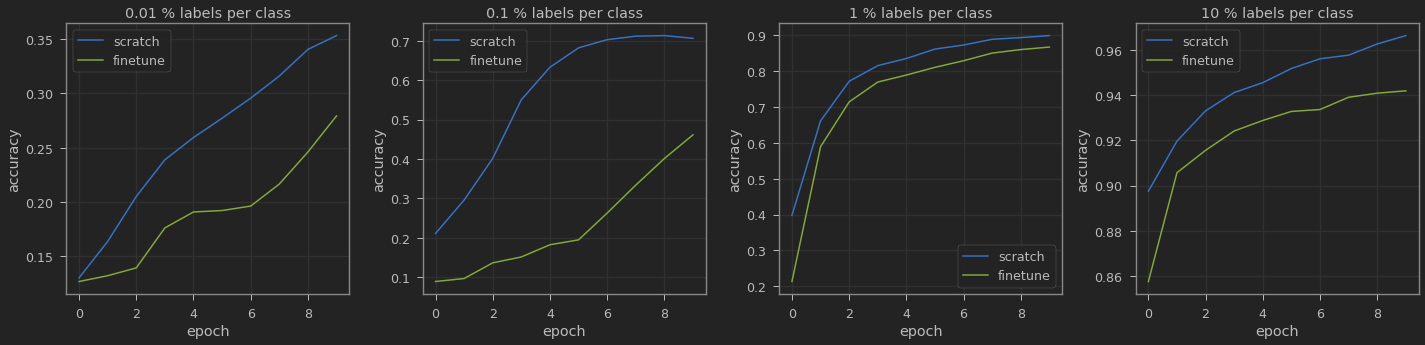

In [24]:
import pandas as pd

res = pd.DataFrame(results)
fig = plt.figure(figsize=(20,5))
for i, pctg in enumerate(pctgs):
    ax = plt.subplot(1, len(pctgs), i + 1)
    plt.plot(res.scratch[i])
    plt.plot(res.finetune[i])
    ax.set_title(f'{pctg} % labels per class')
    ax.set_xlabel('epoch')
    ax.set_ylabel('accuracy')
    ax.grid(True)
    ax.legend(['scratch', 'finetune'])
plt.tight_layout()
plt.show()

diferentes versiones: varaitional, gans, ...

en texto va muy bien (denoising autoencoder, bert)

en imágen hay demasiadas posibilidades -> contrastive learning, pytorch vissl